In [1]:
from IPython.display import HTML

In [2]:
HTML("""
<style>
    #notebook-container {
    width: 80% !important;
}
.dataTable {
    width: 100% !important;
}
.dataTables_scrollBody {
    width: 100% !important;
}
.dataTables_scrollHead {
    width: 100% !important;
}
.dataTables_filter {
   float: right !important;
}
.output_html {
    max-width: calc(100%) !important;
}
.rendered{
    font-size: 125%;
}
</style>
""")

In [3]:
html1 = '<img src="https://images.theconversation.com/files/45159/original/rptgtpxd-1396254731.jpg" width="900" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

# A quick analysis of my reading habits

* What do I read the most?
* What format do I prefer?
* Are there any Genre-Sub-Genre pairs I tend to gravitate towards?
* Who is my most read author?
* How long does it take me to read books?

In [4]:
import pandas as pd
import seaborn as sns
import plot

df = pd.read_csv('BookList.csv')

#removes any blank rows or books I never finished/rated
df = df[df['Rating'].notnull()]

# convert columns to correct (or better) data types
df[['Year', 'Pages']] = df[['Year', 'Pages']].apply(pd.to_numeric, downcast='integer')
df['Duration'] = df['Duration'].apply(pd.to_numeric, downcast='integer')
df['Rating'] = df['Rating'].apply(pd.to_numeric, downcast='float')
df['Start Date']= pd.to_datetime(df['Start Date'])
df['Finish Date']= pd.to_datetime(df['Finish Date'])
df

,Title,Author,Publisher,Genre,Sub-Genre,Year,Pages,Format,Start Date,Finish Date,Duration,Rating
0,The War of Art,Steven Pressfield,Black Irish Entertrainment,Nonfiction,Self Help,2012,190,Physical,NaT,NaT,NaN,3.0
1,The Sound of the Mountain,Yasunari Kawabata,Vintage,Fiction,Cultural,1996,235,eBook,2021-04-21,2021-05-17,27.0,4.5
2,The Four Agreements,Don Miguel Ruiz,Amber-Allen Publishing,Nonfiction,Self Help,1997,140,Physical,2020-12-16,2020-12-16,1.0,5.0
3,The Art of Learning,Josh Waitzkin,Free Press,Nonfiction,Self Help,2007,288,Physical,2021-03-30,2021-04-04,6.0,5.0
4,Almond: A Novel,Won Pyung Sohn,HarperVia,Fiction,Young Adult,2017,154,eBook,2021-08-29,2021-08-30,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,The Emigrants,W.G. Sebald,Vintage,Fiction,German Literature,1992,159,eBook,2024-04-02,2024-04-14,13.0,8.0
61,1Q84 - Part 1,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,387,Physical,2024-04-15,2024-04-23,9.0,7.5
62,1Q84 - Part 2,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,352,Physical,2024-04-23,2024-04-30,8.0,7.5
63,1Q84 - Part 3,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,418,Physical,2024-04-30,2024-05-09,10.0,8.0


### Genre Count

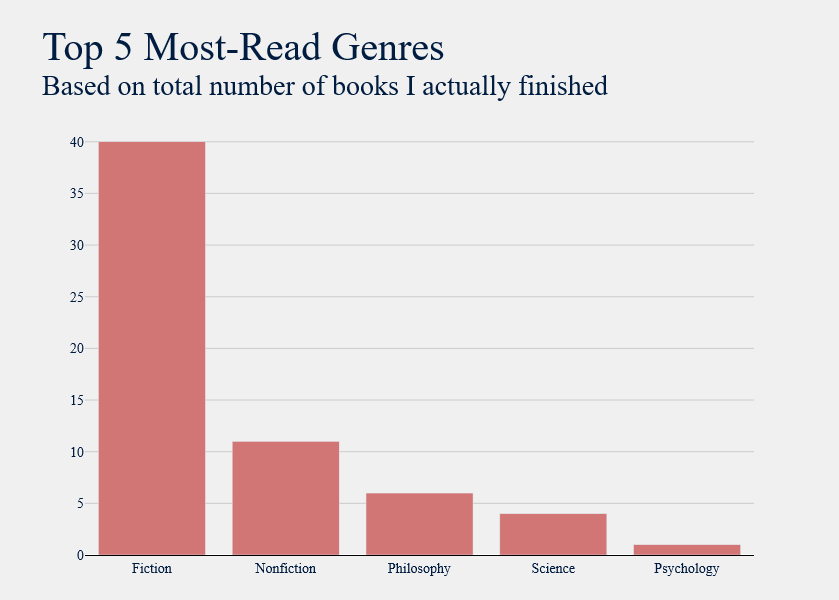

In [5]:
title = "Top 5 Most-Read Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Genre', title, sub, color="#d27575")

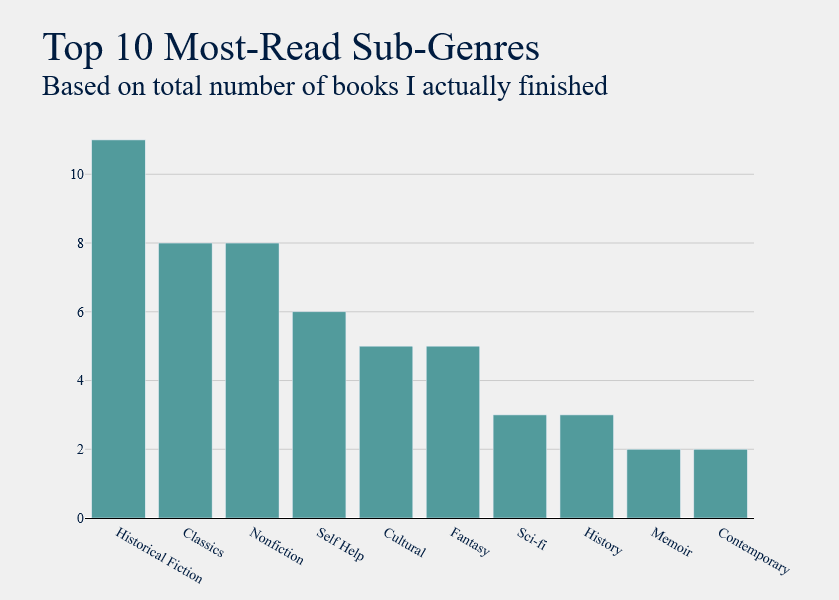

In [6]:
title = "Top 10 Most-Read Sub-Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Sub-Genre', title, sub, 10, color="#529b9c")

In [7]:
#df[df.isna().any(axis=1)]

### Most Common Genre-Sub-Genre Pairing

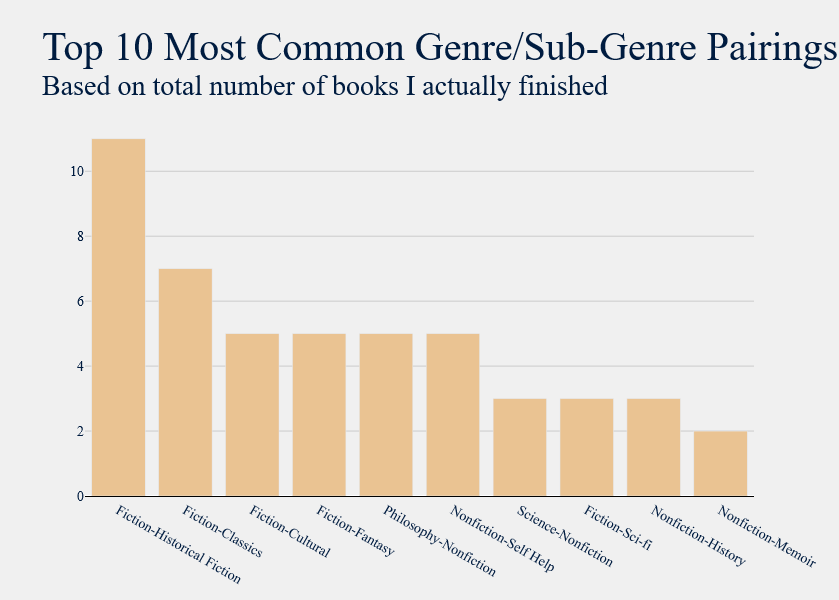

In [8]:
title = "Top 10 Most Common Genre/Sub-Genre Pairings"
sub = f"Based on total number of books I actually finished"

df['Genre Pair'] = df['Genre'] + '-' + df['Sub-Genre']
plot.gen_bar_graph(df, 'Genre Pair', title, sub, num=10, color="#eac392")

### Most-Read Author

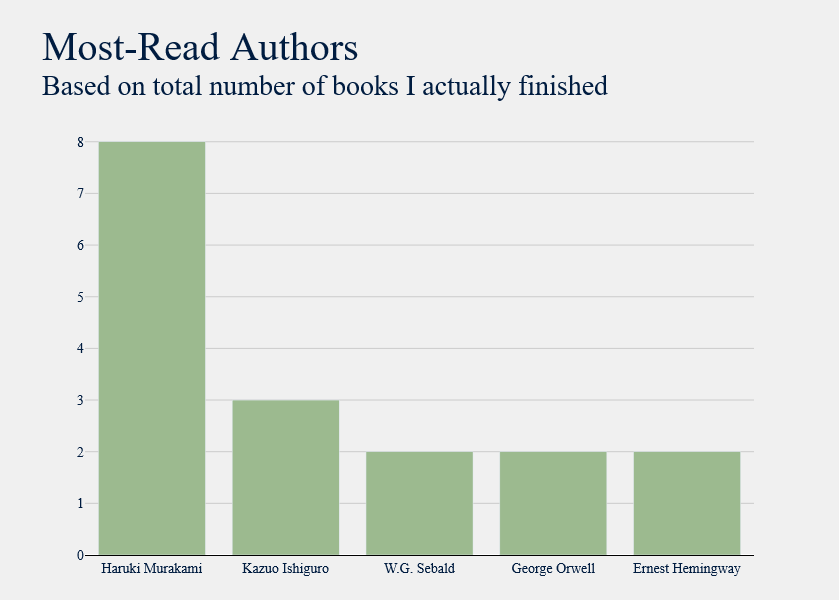

In [9]:
title = "Most-Read Authors"
sub = f"Based on total number of books I actually finished"
plot.gen_bar_graph(df, 'Author', title, sub, color="#9cba8f")

In [29]:
physical = (df[df['Format'] == 'Physical'].groupby('Genre')['Title']
            .count()
            .reset_index()
            .rename(columns={'Title':'Physical'}))
ebook = (df[df['Format'] == 'eBook'].groupby('Genre')['Title']
         .count()
         .reset_index()
         .rename(columns={'Title':'eBook'}))

format_df = pd.concat([physical, ebook['eBook']], axis=1).fillna(0).set_index('Genre')
format_df['eBook'] = format_df['eBook'].astype(int)

In [30]:
format_df.dtypes

Physical    int64
eBook       int32
dtype: object

In [12]:
# format_df.columns
# format_df.index
# format_df.columns.unique()
# list(format_df['Fiction'])

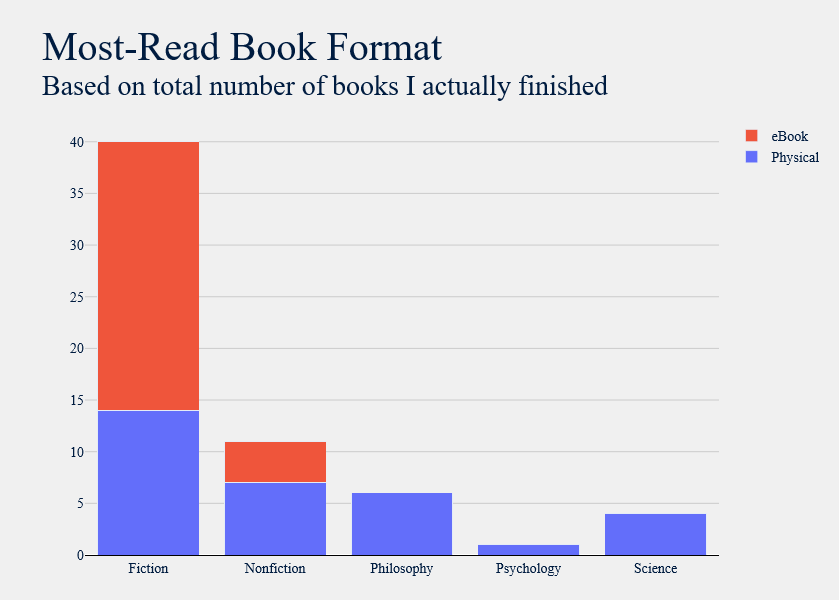

In [13]:
title = "Most-Read Book Format"
sub = f"Based on total number of books I actually finished"
plot.gen_stacked_bar_graph(format_df, title, sub)

## This is still a test to see if GitHub Pages is working correctly. More in-depth analysis to come soon!

In [14]:
# # Clean up space
#       - name: Remove unnecessary files
#         run: |
#           rm -rf /usr/share/dotnet
#           rm -rf /opt/ghc
#           rm -rf "/usr/local/share/boost"
#           rm -rf "$AGENT_TOOLSDIRECTORY"